<img src="https://raw.githubusercontent.com/ml-unison/regresion-logistica/master/imagenes/ml-unison.png" width="250">

# Maquinas de vectores de soporte

**Julio Waissman Vianova**

En esta libreta vamos a ver las diferencias entre los diferentes *kernels* así como el efecto del parámetro $C$ en la clasificación por máquinas de vectores de soporte. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
plt.style.use('ggplot')
%matplotlib inline



### 1. Generación de las bases de datos con las que vamos a probar


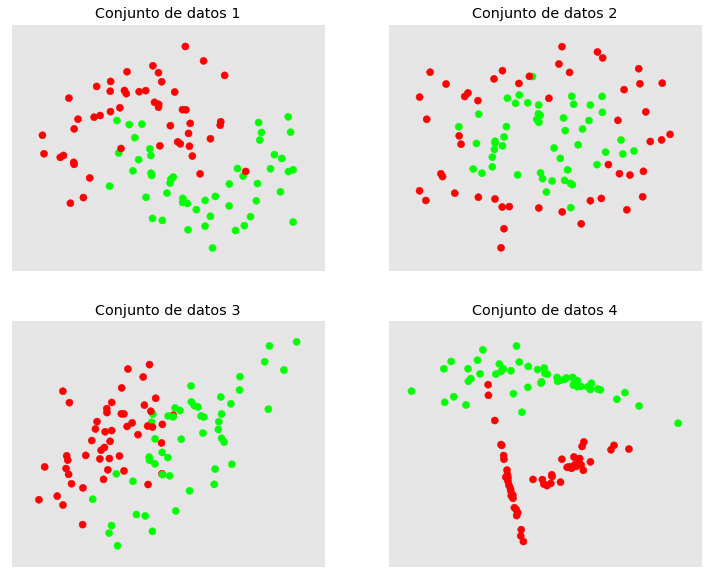

In [2]:
# Conjuntos de datos para probar
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Datos en forma de media luna
X1, y1 = datasets.make_moons(noise=0.3, random_state=0)

# Datos en forma de círculos
X2, y2 = datasets.make_circles(noise=0.2, factor=0.5, random_state=1)

# Datos en forma de regresion lineal
X3, y3 = datasets.make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1
)
# Le agregamos ruido para hacerlos interesantes
rng = np.random.RandomState(2)
X3 += 2 * rng.uniform(size=X3.shape)

X4, y4 = datasets.make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2
)

# Los conjuntos de datos irdenados como una lista de pares ordenados
datasets = [(X1, y1), (X2, y2), (X3, y3), (X4, y4)]

# Y los grafiacamos para verlos
figure = plt.figure(figsize=(10, 10))
cm_escala = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

for (i, ds) in enumerate(datasets):

    # Selecciona los valores del conjunto de datos y los escala
    X, y = ds
    X = StandardScaler().fit_transform(X)

    # Grafica
    ax = plt.subplot(2, 2, i+1)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cm_escala)
    ax.set_xlim(X[:, 0].min() - .5, X[:, 0].max() + .5)
    ax.set_ylim(X[:, 1].min() - .5, X[:, 1].max() + .5)
    ax.set_xticks(())
    ax.set_yticks(())
    plt.title(f"Conjunto de datos {i+1}")
figure.subplots_adjust(left=.02, right=.98)    
plt.show()



### 2. Probando diferentes kernels en los conjuntos de datos





Base de datos 1


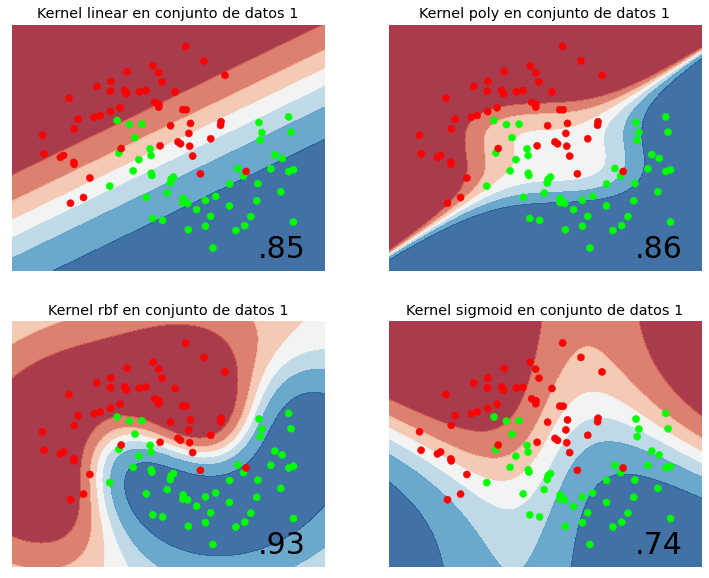



Base de datos 2


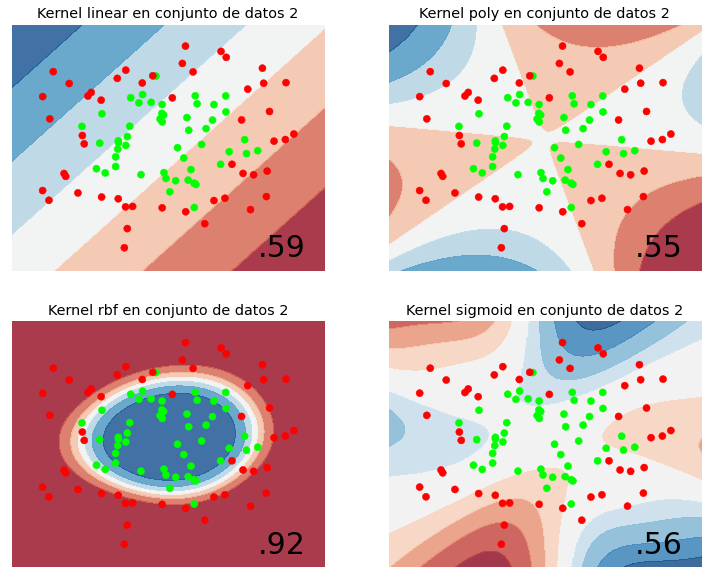



Base de datos 3


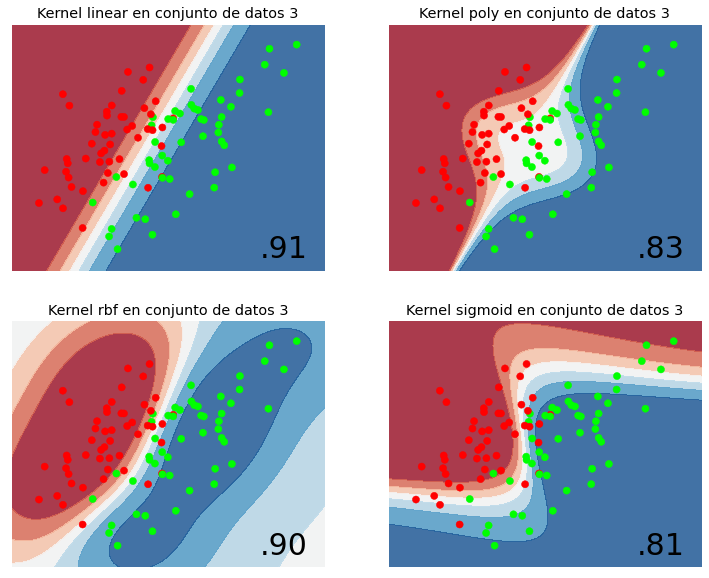



Base de datos 4


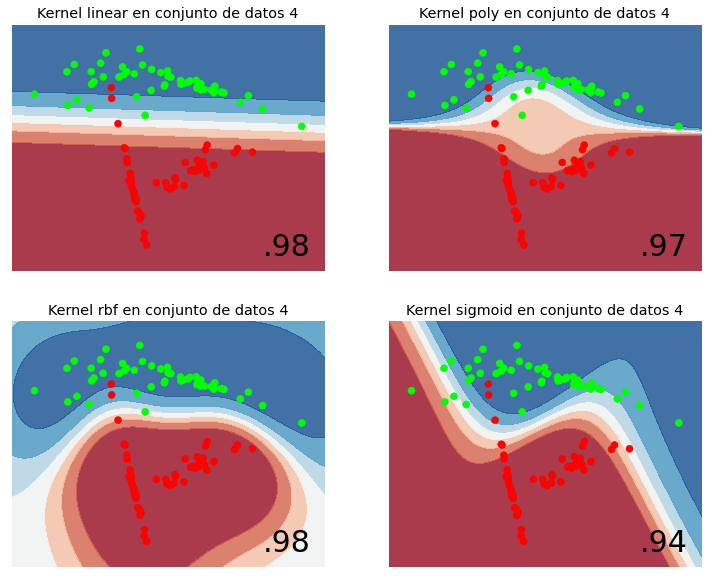

In [3]:
## Vamos a escoger una escala de colores de alto contraste
cm = plt.cm.RdBu

# Una figura por cada conjunto de datos
for (cual, ds) in enumerate(datasets):
    
    print(f"\n\nBase de datos {cual + 1}")
    figure = plt.figure(figsize=(10, 10))

    # Escalar y selecciona valores de entrenamiento y prueba
    X, y = ds
    X = StandardScaler().fit_transform(X)
 
    # Meshgrid para pintar las regiones
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02),
                         np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02))

    # Por cada clasificador
    for (i, kernel) in enumerate(['linear', 'poly', 'rbf', 'sigmoid']):
        ax = plt.subplot(2, 2, i + 1)

        # Entrenamiento
        clf = SVC(kernel=kernel, C=1, probability=True)
        clf.fit(X, y)
        score = clf.score(X, y)

        # Clasifica cada punto en el meshgrid
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)

        # Asigna un contorno de probabilidad
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        # Grafica los datos
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_escala, s=50)
        # Arregla axes y pone titulos
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=30, horizontalalignment='right')
        plt.title(f"Kernel {kernel} en conjunto de datos {cual + 1}")

    figure.subplots_adjust(left=.02, right=.98)
    plt.show()

### 3. Que pasa cuando aumenta $C$ en el clasificador lineal



Base de datos 1


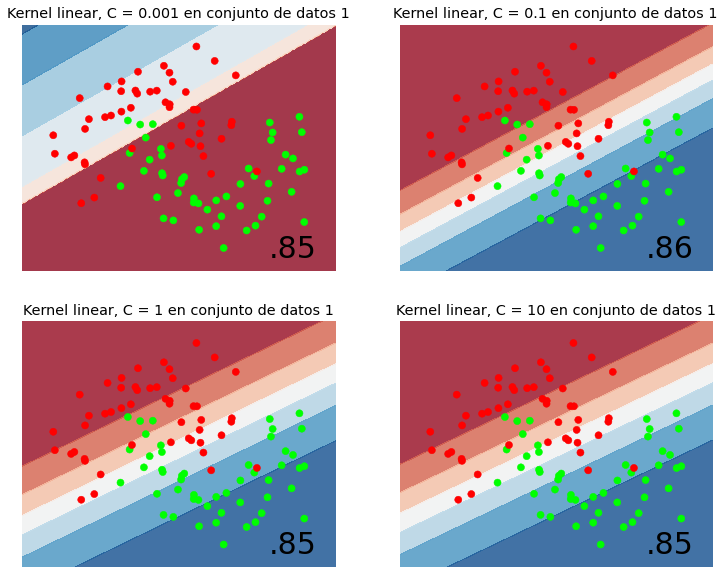



Base de datos 2


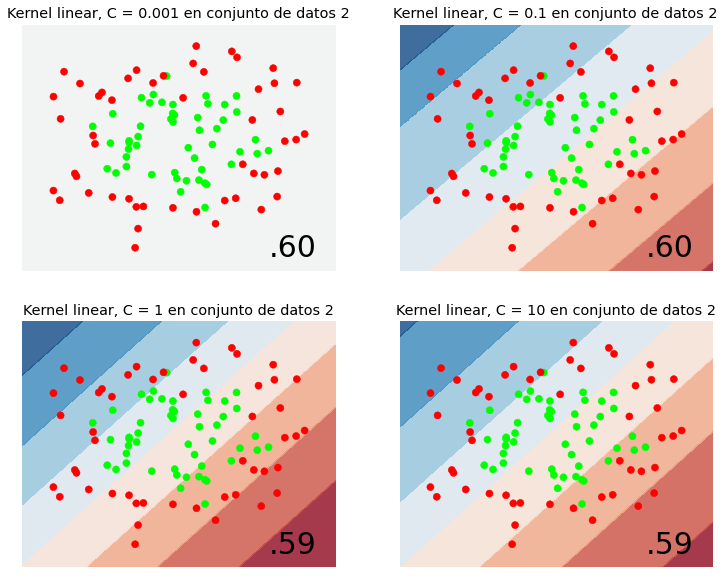



Base de datos 3


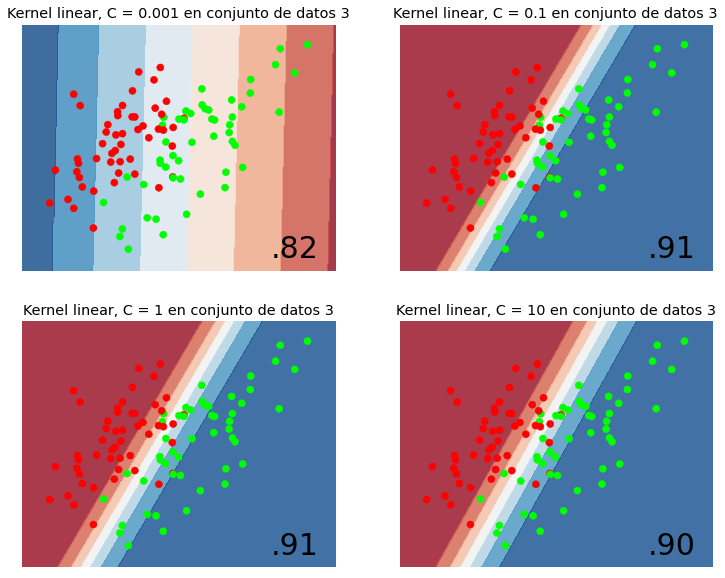



Base de datos 4


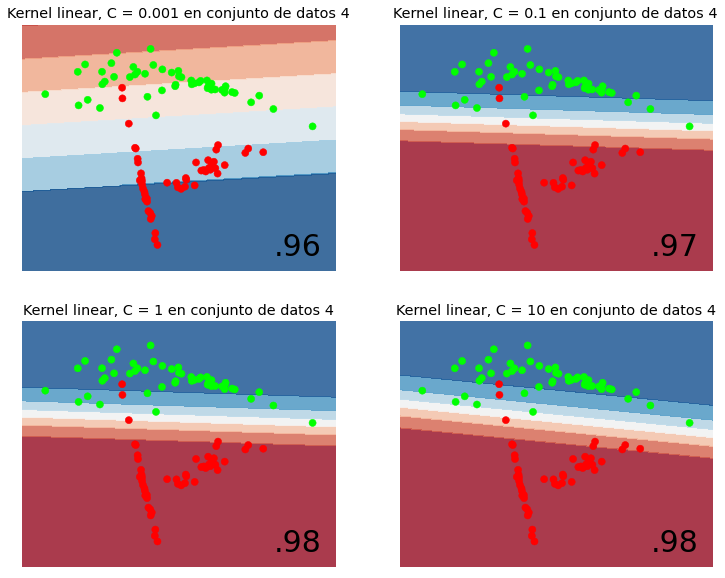

In [16]:
kernel = 'linear'

# Una figura por cada conjunto de datos
for (cual, ds) in enumerate(datasets):
    
    print(f"\n\nBase de datos {cual + 1}")
    figure = plt.figure(figsize=(10, 10))

    # Escalar y selecciona valores de entrenamiento y prueba
    X, y = ds
    X = StandardScaler().fit_transform(X)
 
    # Meshgrid para pintar las regiones
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02),
                         np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02))

    # Por cada clasificador
    for (i, C) in enumerate([.001, .1, 1, 10]):
        ax = plt.subplot(2, 2, i + 1)

        # Entrenamiento
        clf = SVC(kernel=kernel, C=C, probability=True)
        clf.fit(X, y)
        score = clf.score(X, y)

        # Clasifica cada punto en el meshgrid
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)

        # Asigna un contorno de probabilidad
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        # Grafica los datos
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_escala, s=50)
        # Arregla axes y pone titulos
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=30, horizontalalignment='right')
        plt.title(f"Kernel {kernel}, C = {C} en conjunto de datos {cual + 1}")

    figure.subplots_adjust(left=.02, right=.98)
    plt.show()

**Ejercicio 1. Prueba modificar los valores de C para los diferentes kernels manteniendo el resto de los parámetros por default. Comenta aquí mismo tus conclusiones.**
En el cada uno de los kernels no hubo gran diferencia de precisión con el cambio del valor de C en cada conjunto de datos. Lo que pude observer es que los kernels de linear y rbf fueron los mas precisos con estos datos, teniendo scores algo parecidos, pero mejores que los otros dos kernels. 

### 4. La variable `gamma` para los kernel `rbf`, `poly` y `sigmoid`

** Ejercicio 2. Escribe aquí mismo que significa la variable `gamma` ($\gamma$) ** para los diferentes kernels (puedes poner la ecuación si es necesario)

1. Para `rbf`: *Insertar texto aqui*

2. Para `poly`: *Insertar texto aqui*

3. Para `sigmois`: *Insertar texto aqui*




Base de datos 1


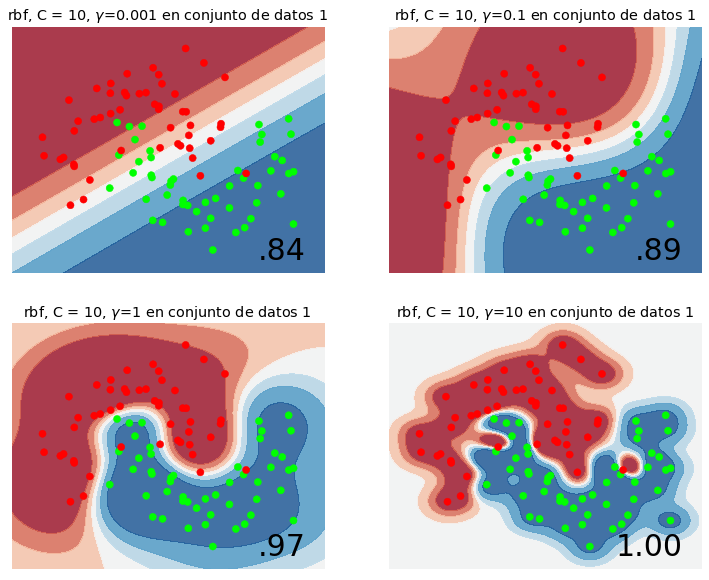



Base de datos 2


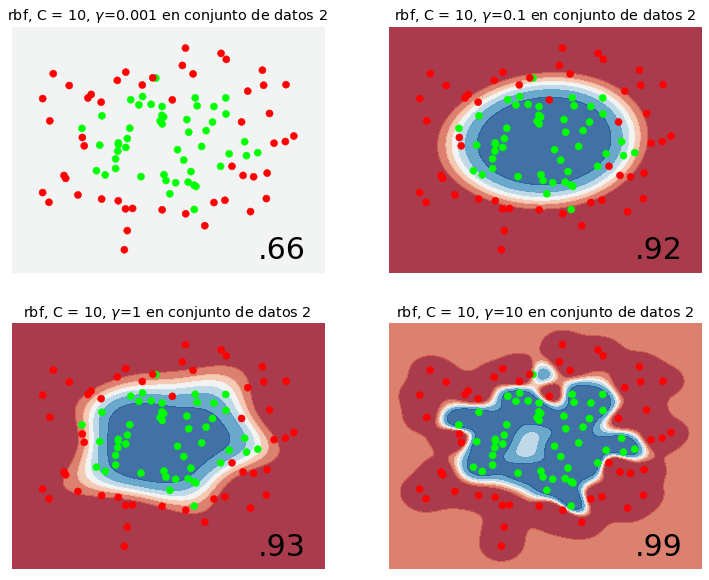



Base de datos 3


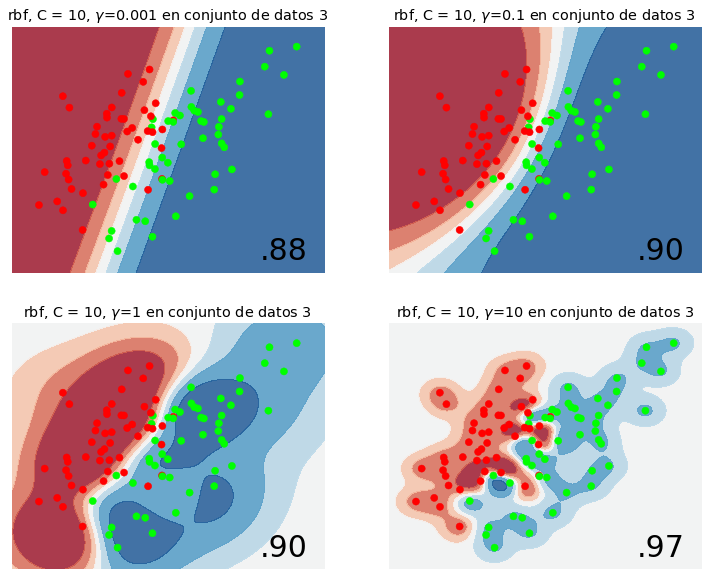



Base de datos 4


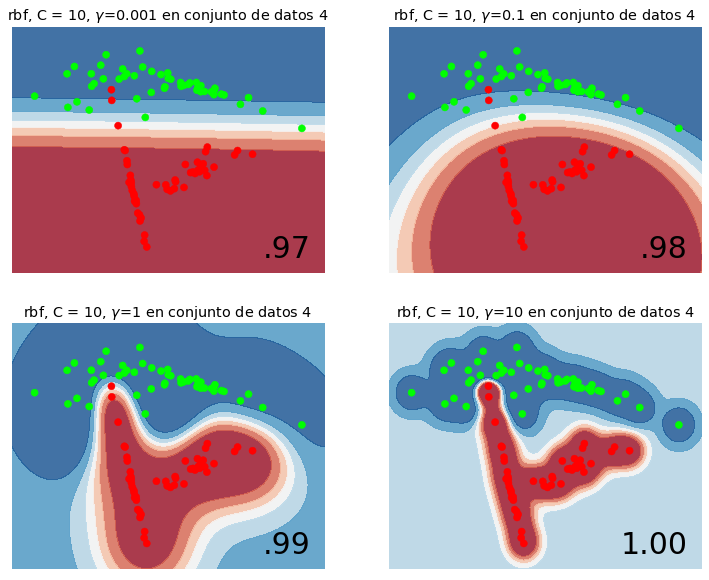

In [15]:
kernel = 'rbf'
C = 10

# Una figura por cada conjunto de datos
for (cual, ds) in enumerate(datasets):
    
    print(f"\n\nBase de datos {cual + 1}")
    figure = plt.figure(figsize=(10, 10))

    # Escalar y selecciona valores de entrenamiento y prueba
    X, y = ds
    X = StandardScaler().fit_transform(X)
 
    # Meshgrid para pintar las regiones
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02),
                         np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02))

    # Por cada clasificador
    for (i, gamma) in enumerate([.001, .1, 1, 10]):
        ax = plt.subplot(2, 2, i + 1)

        # Entrenamiento
        clf = SVC(kernel=kernel, C=C, gamma=gamma, probability=True)
        clf.fit(X, y)
        score = clf.score(X, y)

        # Clasifica cada punto en el meshgrid
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)

        # Asigna un contorno de probabilidad
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        # Grafica los datos
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_escala, s=50)
        # Arregla axes y pone titulos
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=30, horizontalalignment='right')
        plt.title(f"{kernel}, C = {C}, $\gamma$={gamma} en conjunto de datos {cual + 1}")

    figure.subplots_adjust(left=.02, right=.98)
    plt.show()

**Ejercicio 3: Encuentra la mejor combiación de $C$ y $\gamma$ para los 3 tipos de *kernel*, explica en cada uno en que afecta la $\gamma$ y porque tiene una influencia tan diferente.**

**Ejercicio 4: Como viste, existe mucho código repetido en los incisos 2, 3 y 4, por lo que se puede generalizar una parte con una función. Intenta generalizarlo** 

**Exta bono: ¿Que significa el parámetro `coef0` para los *kernels* `sigmoid` y `poly`? ¿Cómo afeca en la clasificación?